#check ZnO with paper
#loop through refs (both sites)

#YMnO3
#
#HT (>~1400 K): P63/mmc (#194)
#RT (ferroelectric phase): P63mc (#185) 



Crystal properties

                    CIF file:  /home/spc93/spc_cifs/YMnO3_P63cm_cod_2300161_cifbib.cif
                     Lattice:  6.222 6.222 11.371 90.00 90.00 120.00
                   All sites:  Y1, Y2, Mn1, O1, O2, O3, O4
               Site selected:  Mn1
                 Site vector:  0.352 0.000 0.000
       No. of spacegroup ops:  12
      No. of sym ops at site:  2
 No. of equiv. sites in cell:  6
   No. of pg ops for crystal:  12

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 0.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -1.33+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either
              Glide or screw:  True


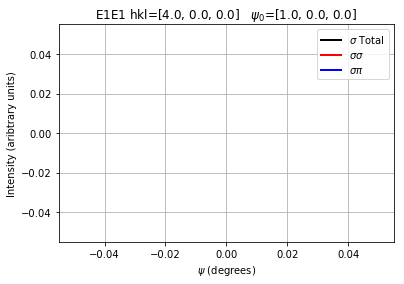


Tensor components

         Crystal (spherical):  [-0.-0.j -0.+0.j  1.+0.j  0.+0.j -0.+0.j]
            Atom (spherical):  [ 0.564+0.326j  1.   +0.j     0.121-0.07j  -0.5  +0.866j  0.   -0.651j]
  Struct. factor (spherical):  [ 1.   -0.j     0.   -0.806j  0.078-0.j    -0.   +0.806j  1.   +0.j   ]

Crystal (Cartesian):

[[-0.611+0.j  0.   +0.j -0.   +0.j]
 [ 0.   +0.j -0.611+0.j -0.   +0.j]
 [-0.   +0.j -0.   +0.j  1.222+0.j]]

Atom (Cartesian):

[[ 0.479+0.j -1.006+0.j  1.545+0.j]
 [-1.006+0.j -0.683+0.j -0.892+0.j]
 [ 1.545+0.j -0.892+0.j  0.204+0.j]]

Struct. factor (Cartesian):

[[-0.938-0.j    -0.   -0.j    -0.   +0.781j]
 [-0.   -0.j     1.   +0.j     0.   +0.j   ]
 [-0.   +0.781j  0.   +0.j    -0.062+0.j   ]]



<Figure size 432x288 with 0 Axes>

In [7]:
import TensorScatteringClass as ten
import numpy as np


#t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/YMnO3_P63_mmc_cod_2300162_cifbib.cif', Site='Mn1');
t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/YMnO3_P63cm_cod_2300161_cifbib.cif', Site='Mn1');

hkl, proc , K, Parity = np.array([4,0,0]), 'E1E1', 2, 1
#hkl, proc , K, Parity = np.array([1,1,5]), 'E1E2', 3, -1
#hkl, proc , K, Parity = np.array([0,1,1]), 'EE2', 4, 1



name = '%s hkl = (%i, %i, %i) K=%i' % (proc, hkl[0], hkl[1], hkl[2], K)
name = '/home/spc93/tmp/' + name
t.PlotIntensityInPolarizationChannels(proc, lam=1, hkl=hkl, hkln=np.array([1,0,0]), K=K, Time=+1, Parity=Parity, mk=None, lk=None, sk=None, sigmapi='sigma', savefile = name)
t.print_tensors()




In [17]:
import TensorScatteringClass as ten
import numpy as np

t_dic={}

t_dic['P63mmc_Mn']=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/YMnO3_P63_mmc_cod_2300162_cifbib.cif', Site='Mn1');
t_dic['P63cm_Mn']=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/YMnO3_P63cm_cod_2300161_cifbib.cif', Site='Mn1');
t_dic['P63mmc_Y']=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/YMnO3_P63_mmc_cod_2300162_cifbib.cif', Site='Y1');
t_dic['P63cm_Y']=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/YMnO3_P63cm_cod_2300161_cifbib.cif', Site='Y1');


def calc_ten(hkl, tt):
    proc_dic = {'E1E1':{'K':2, 'Parity':1},
                'E1E2':{'K':3, 'Parity':-1},
                'E2E2':{'K':4, 'Parity':1}
               }
    lam = 1
    Time = 1
    psideg = np.arange(0, 360, 25)
    hkln = np.array([0.1234, 0.7777, 0.22804969])
    
    dic = {}
    for proc in proc_dic.keys():
        #print proc, lam, hkl, hkln, psideg, proc_dic[proc]['K'], Time, proc_dic[proc]['Parity']
        Iss, Isp,Ips, Ipp = tt.CalculateIntensityInPolarizationChannels(proc, lam, hkl, hkln, psideg=psideg, K=proc_dic[proc]['K'], Time=Time, Parity=proc_dic[proc]['Parity'])
        ten_allowed = tt.tensor_allowed==1
        sg_allowed = tt.gen_scalar_allowed==1
        tensor = max(abs(tt.Fs)**2)>0.000001   
        signal = max(Iss**2 + Isp**2 + Ips**2 + Ipp**2)>0.000001
        dic[proc] = {'tensor': tensor, 'signal': signal}
        
    return {'hkl': list(hkl), 'sg_allowed': sg_allowed, 'ten_allowed':ten_allowed, 'E1E1': dic['E1E1'], 'E1E2': dic['E1E2'], 'E2E2': dic['E2E2']}

def loop_calc(t_dic):
    for key in t_dic.keys():
        

        hkl_list = []
        for h in range(8):
            for k in range(8):
                for l in range(8):
                    hkl_list += [np.array([h, k, l])]

        ten_list = []
        for hkl in hkl_list:
            ten_list += [calc_ten(hkl, t_dic[key])]

        f = open('/home/spc93/tmp/'+key+'_ats.dat', 'w')
        
        f.write('hkl\t\tsg_allowed\tten_allowed\tproc\ttensor\tsignal\tproc\ttensor\tsignal\tproc\ttensor\tsignal\n')
        
        for r in ten_list:
            if r['ten_allowed'] == True and r['sg_allowed'] == False: #resonant forbidden reflectiions
                f.write(str(r['hkl'])+'\t'+str(r['sg_allowed'])+'\t\t'+str(r['ten_allowed'])+'\t\t'+'E1E1'+'\t'+str(r['E1E1']['tensor'])+'\t'+str(r['E1E1']['signal'])+'\t'+'E1E2'+ '\t'+str(r['E1E2']['tensor'])+'\t'+str(r['E1E2']['signal'])+'\t'+'E2E2'+'\t'+str(r['E2E2']['tensor'])+'\t'+str(r['E2E2']['signal'])+'\n')

        f.close()
        
loop_calc(t_dic)
            
            
            


Crystal properties

                    CIF file:  /home/spc93/spc_cifs/YMnO3_P63_mmc_cod_2300162_cifbib.cif
                     Lattice:  3.630 3.630 11.354 90.00 90.00 120.00
                   All sites:  Y1, Mn1, O1, O2
               Site selected:  Mn1
                 Site vector:  0.333 0.667 0.250
       No. of spacegroup ops:  24
      No. of sym ops at site:  12
 No. of equiv. sites in cell:  2
   No. of pg ops for crystal:  24

Crystal properties

                    CIF file:  /home/spc93/spc_cifs/YMnO3_P63cm_cod_2300161_cifbib.cif
                     Lattice:  6.222 6.222 11.371 90.00 90.00 120.00
                   All sites:  Y1, Y2, Mn1, O1, O2, O3, O4
               Site selected:  Mn1
                 Site vector:  0.352 0.000 0.000
       No. of spacegroup ops:  12
      No. of sym ops at site:  2
 No. of equiv. sites in cell:  6
   No. of pg ops for crystal:  12

Crystal properties

                    CIF file:  /home/spc93/spc_cifs/YMnO3_P63_mmc_cod_2300162_ci


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 6.0]
                Site allowed:  Yes
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 1.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 1.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 1.0, 5.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 2.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 2.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 2.0, 4.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 3.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 3.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 3.0, 3.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 4.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 4.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 4.0, 2.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 5.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 5.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 5.0, 1.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 5.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 6.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 6.0, 0.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 6.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 6.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 6.0, 7.0]
                Site allowed:  No
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 7.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 7.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 7.0, 6.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 0.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 0.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 0.0, 5.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 1.0, 3.0]
                Site allowed:  No
   Structure factor for site:  -0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 1.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 1.0, 4.0]
                Site allowed:  Yes
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 2.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 2.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 2.0, 3.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 3.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 3.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 3.0, 2.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 4.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 4.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 4.0, 1.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 4.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 5.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 5.0, 0.0]
                Site allowed:  Yes
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 5.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 5.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 5.0, 7.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 6.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 6.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 6.0, 6.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 7.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 7.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 7.0, 5.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 0.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 0.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 0.0, 4.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 1.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 1.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 1.0, 3.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 2.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 2.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 2.0, 2.0]
                Site allowed:  Yes
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 3.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 3.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 3.0, 1.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 3.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 4.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 4.0, 0.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 4.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 4.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 4.0, 7.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 5.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 5.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 5.0, 6.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 6.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 6.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 6.0, 5.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 7.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 7.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 7.0, 4.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 0.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 0.0, 3.0]
                Site allowed:  No
   Structure factor for site:  -0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 0.0, 3.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 1.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 1.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 1.0, 2.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 2.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 2.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 2.0, 1.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 2.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 3.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 3.0, 0.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 3.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 3.0, 7.0]
                Site allowed:  No
   Structure factor for site:  -0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 3.0, 7.0]
                Site allowed:  No
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 4.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 4.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 4.0, 6.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 5.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 5.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 5.0, 5.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 6.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 6.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 6.0, 4.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 7.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 7.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 7.0, 3.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 0.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 0.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 0.0, 2.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 1.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 1.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 1.0, 1.0]
                Site allowed:  No
   Structure factor for site:


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 1.0, 7.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 2.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 2.0, 0.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 2.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 2.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 2.0, 7.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 3.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 3.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 3.0, 6.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 4.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 4.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 4.0, 5.0]
                Site allowed:  No
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 5.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 5.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 5.0, 4.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 6.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 6.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 6.0, 3.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 7.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 7.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 7.0, 2.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 0.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 0.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 0.0, 1.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 0.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 1.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 1.0, 0.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 1.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 1.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 1.0, 7.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 2.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 2.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 2.0, 6.0]
                Site allowed:  Yes
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 3.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 3.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 3.0, 5.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 4.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 4.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 4.0, 4.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 5.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 5.0, 3.0]
                Site allowed:  No
   Structure factor for site:  -0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 5.0, 3.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 6.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 6.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 6.0, 2.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 7.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 7.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 7.0, 1.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 7.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 0.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 0.0, 0.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 0.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 0.0, 7.0]
                Site allowed:  No
   Structure factor for site:  -0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 0.0, 7.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 1.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 1.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 1.0, 6.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 2.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 2.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 2.0, 5.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 3.0, 3.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 3.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 3.0, 4.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 4.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 4.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 4.0, 3.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 5.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 5.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 5.0, 2.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 6.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 6.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 6.0, 1.0]
                Site allowed:  No
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 6.0, 7.0]
                Site allowed:  No
   Structure factor for site:  -0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 7.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 7.0, 0.0]
                Site allowed:  Yes
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 7.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 7.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 7.0, 7.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 0.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 0.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 0.0, 6.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 1.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 1.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 1.0, 5.0]
                Site allowed:  No
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 2.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 2.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 2.0, 4.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 3.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 3.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 3.0, 3.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 4.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 4.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 4.0, 2.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 5.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 5.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 5.0, 1.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 5.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  -1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 6.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 6.0, 0.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 6.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  1.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 6.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 6.0, 7.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 7.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 7.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 7.0, 6.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 5.0]
                Site allowed:  No
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 1.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 1.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 1.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 2.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.92+-0.56i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 2.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 2.0, 3.0]
                Site allowed:  No
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 3.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 3.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.92+-0.56i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 3.0, 2.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 4.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 4.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 4.0, 1.0]
                Site allowed:  No
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 4.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 5.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 5.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 5.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.32+-1.51i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 5.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 5.0, 7.0]
                Site allowed:  No
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 6.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 6.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.32+-1.51i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 6.0, 6.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 7.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 7.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 7.0, 5.0]
                Site allowed:  No
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 0.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 0.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 0.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 1.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.92+-0.56i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 1.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 1.0, 3.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 2.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 2.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.92+-0.56i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 2.0, 2.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 3.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 3.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 3.0, 1.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 3.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 4.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 4.0, 0.0]
                Site allowed:  Yes
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 4.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.32+-1.51i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 4.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 4.0, 7.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 5.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 5.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.32+-1.51i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 5.0, 6.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 6.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 6.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 6.0, 5.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 7.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 7.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 7.0, 4.0]
                Site allowed:  Yes
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 0.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.92+-0.56i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 0.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 0.0, 3.0]
                Site allowed:  No
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 1.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 1.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.92+-0.56i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 1.0, 2.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 2.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 2.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 2.0, 1.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 2.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 3.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 3.0, 0.0]
                Site allowed:  Yes
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 3.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.32+-1.51i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 3.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 3.0, 7.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 4.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 4.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.32+-1.51i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 4.0, 6.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 5.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 5.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 5.0, 5.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 6.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 6.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 6.0, 4.0]
                Site allowed:  Yes
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 7.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.92+-0.56i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 7.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 7.0, 3.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 0.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.92+-0.56i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 0.0, 2.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 1.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 1.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 1.0, 1.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 1.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 2.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 2.0, 0.0]
                Site allowed:  Yes
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 2.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.32+-1.51i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 2.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 2.0, 7.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 3.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 3.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.32+-1.51i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 3.0, 6.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 4.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 4.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 4.0, 5.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 5.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 5.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 5.0, 4.0]
                Site allowed:  Yes
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 6.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.92+-0.56i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 6.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 6.0, 3.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 7.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 7.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.92+-0.56i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 7.0, 2.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 0.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 0.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 1.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 1.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 1.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.32+-1.51i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 1.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 1.0, 7.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 2.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 2.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.32+-1.51i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 2.0, 6.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 3.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 3.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 3.0, 5.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 4.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 4.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 4.0, 4.0]
                Site allowed:  Yes
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 5.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.92+-0.56i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 5.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 5.0, 3.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 6.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 6.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.92+-0.56i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 6.0, 2.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 7.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 7.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 7.0, 1.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 7.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 0.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 0.0, 0.0]
                Site allowed:  Yes
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 0.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.32+-1.51i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 0.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 0.0, 7.0]
                Site allowed:  No
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 1.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 1.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.32+-1.51i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 1.0, 6.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 2.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 2.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 2.0, 5.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 3.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 3.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 3.0, 4.0]
                Site allowed:  Yes
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 4.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.92+-0.56i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 4.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 4.0, 3.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 5.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 5.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.92+-0.56i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 5.0, 2.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 6.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 6.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 6.0, 1.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 6.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 7.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 7.0, 0.0]
                Site allowed:  Yes
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 7.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.32+-1.51i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 7.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 7.0, 7.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 0.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 0.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.32+-1.51i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 0.0, 6.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 1.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 1.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 1.0, 5.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 2.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 2.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 2.0, 4.0]
                Site allowed:  Yes
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 3.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.92+-0.56i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 3.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 3.0, 3.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 4.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 4.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.92+-0.56i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 4.0, 2.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 5.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 5.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 5.0, 1.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 5.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 6.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 6.0, 0.0]
                Site allowed:  Yes
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 6.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.32+-1.51i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 6.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 6.0, 7.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 7.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 7.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.32+-1.51i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 7.0, 6.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 0.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 0.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 0.0, 5.0]
                Site allowed:  No
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 1.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 1.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 1.0, 4.0]
                Site allowed:  Yes
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 2.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.92+-0.56i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 2.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 2.0, 3.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 3.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 3.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.92+-0.56i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 3.0, 2.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 4.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 4.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 4.0, 1.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 4.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 5.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 5.0, 0.0]
                Site allowed:  Yes
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 5.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.32+-1.51i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 5.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 5.0, 7.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 6.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 6.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.32+-1.51i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 6.0, 6.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 7.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.69+1.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 7.0, 5.0]
                Site allowed:  No
   Structure factor for site:  -0.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 7.0, 5.0]
                Site allowed:  No
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 1.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 1.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 1.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 2.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 2.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 2.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 3.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 3.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 3.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 3.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 4.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 4.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 4.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 4.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 4.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 5.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 5.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 5.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 6.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 6.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 6.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 7.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 7.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 7.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 0.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 0.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 0.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 1.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 1.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 1.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 2.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 2.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 2.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 2.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 3.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 3.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 3.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 3.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 3.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 4.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 4.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 4.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 5.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 5.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 5.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 6.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 6.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 6.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 7.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 7.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 7.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 0.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 0.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 1.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 1.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 1.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 1.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 2.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 2.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 2.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 2.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 2.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 3.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 3.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 3.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 4.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 4.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 4.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 5.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 5.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 5.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 6.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 6.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 6.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 7.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 7.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 7.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 0.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 0.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 1.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 1.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 1.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 1.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 1.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 2.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 2.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 2.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 3.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 3.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 3.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 4.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 4.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 4.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 5.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 5.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 5.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 6.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 6.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 6.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 7.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 7.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 7.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 7.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 0.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 0.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 0.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 0.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 0.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 1.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 1.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 1.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 2.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 2.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 2.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 3.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 3.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 3.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 4.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 4.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 4.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 5.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 5.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 5.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 6.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 6.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 6.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 6.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 7.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 7.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 7.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 7.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 7.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 0.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 0.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 0.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 1.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 1.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 1.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 2.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 2.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 2.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 3.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 3.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 3.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 4.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 4.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 4.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 5.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 5.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 5.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 5.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 6.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 6.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 6.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 6.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 6.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 7.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 7.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 7.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 0.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 0.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 0.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 1.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 1.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 1.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 2.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 2.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 2.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 3.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 3.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 3.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 4.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 4.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 4.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 4.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 5.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 5.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 5.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 5.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 5.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 6.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 6.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 6.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 7.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 7.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 7.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 0.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 0.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 0.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 1.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 1.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 1.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 2.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 2.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 2.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 3.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 3.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 3.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 3.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 4.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 4.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 4.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 4.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 4.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 5.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 5.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 5.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 6.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 6.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 6.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 7.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 7.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 7.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  6.00+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 3.0]
                Site allowed:  No
   Structure factor for site:


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 1.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 1.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -0.38+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 1.0, 2.0]
                Site allowed:  Yes
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 2.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  0.84+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 2.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 2.0, 1.0]
                Site allowed:  No
   Structure factor for site:


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 2.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 3.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  5.77+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 3.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 3.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  5.77+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 3.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 3.0, 7.0]
                Site allowed:  No
   Structure factor for site:


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 4.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 4.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.33+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 4.0, 6.0]
                Site allowed:  Yes
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 5.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.20+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 5.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 5.0, 5.0]
                Site allowed:  No
   Structure factor for site:


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 6.0, 3.0]
                Site allowed:  No
   Structure factor for site:  -0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 6.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  5.09+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 6.0, 4.0]
                Site allowed:  Yes
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 7.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.88+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 7.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 7.0, 3.0]
                Site allowed:  No
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 0.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -0.38+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 0.0, 2.0]
                Site allowed:  Yes
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 1.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -2.96+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 1.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+5.13i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 1.0, 1.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 1.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+5.13i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 2.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  0.11+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 2.0, 0.0]
                Site allowed:  Yes
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 2.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  0.11+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 2.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+-0.98i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 2.0, 7.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 3.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+1.17i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 3.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -0.97+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 3.0, 6.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 4.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -2.76+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 4.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+4.71i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 4.0, 5.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 5.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+-1.66i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 5.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  0.45+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 5.0, 4.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 6.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.59+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 6.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+2.39i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 6.0, 3.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [1.0, 7.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+3.94i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 7.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -2.36+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 7.0, 2.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 0.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  0.84+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  -0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 0.0, 7.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 1.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  0.11+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 1.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 1.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  0.11+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 1.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+-0.98i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 1.0, 7.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 2.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+-4.94i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 2.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -2.82+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 2.0, 6.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 3.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.40+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 3.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+0.76i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 3.0, 5.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 4.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+-2.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 4.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -0.70+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 4.0, 4.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 5.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -2.42+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 5.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+-4.39i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 5.0, 3.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 6.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+1.20i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 6.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 6.0, 2.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 7.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -1.50+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 7.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+-3.15i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 7.0, 1.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [2.0, 7.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+-3.15i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 0.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  5.77+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 0.0, 0.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 0.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  5.77+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 0.0, 7.0]
                Site allowed:  No
   Structure factor for site:  -0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 0.0, 7.0]
                Site allowed:  No
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 1.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+1.17i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 1.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -0.97+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 1.0, 6.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 2.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  1.40+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 2.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+0.76i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 2.0, 5.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 3.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+0.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 3.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  5.31+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 3.0, 4.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 4.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.72+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 4.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+1.30i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 4.0, 3.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 5.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+0.52i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 5.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.75+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 5.0, 2.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 6.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  4.45+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 6.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+0.23i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 6.0, 1.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 6.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+0.23i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 7.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -2.05+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 7.0, 0.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [3.0, 7.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -2.05+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 7.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+1.36i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 7.0, 7.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 0.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 0.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.33+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 0.0, 6.0]
                Site allowed:  Yes
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 1.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -2.76+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 1.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+4.71i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 1.0, 5.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 2.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+-2.08i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 2.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -0.70+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 2.0, 4.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 3.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.72+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 3.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+1.30i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 3.0, 3.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 4.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+4.07i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 4.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -2.56+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 4.0, 2.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 5.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -0.54+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 5.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+-2.61i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 5.0, 1.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 5.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+-2.61i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 6.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -2.11+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 6.0, 0.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 6.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -2.11+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 6.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+2.58i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 6.0, 7.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [4.0, 7.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+3.07i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 7.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -2.26+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [4.0, 7.0, 6.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 0.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  2.20+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 0.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 0.0, 5.0]
                Site allowed:  No
   Structure factor for site:


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 1.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+-1.66i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 1.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  0.45+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 1.0, 4.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 2.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -2.42+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 2.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+-4.39i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 2.0, 3.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 3.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+0.52i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 3.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  2.75+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 3.0, 2.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 4.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -0.54+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 4.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+-2.61i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 4.0, 1.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 4.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+-2.61i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 5.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -1.79+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 5.0, 0.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 5.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -1.79+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 5.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+-3.79i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 5.0, 7.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 6.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+0.75i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 6.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.99+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 6.0, 6.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [5.0, 7.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -1.46+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 7.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+-3.48i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 7.0, 5.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 0.0, 3.0]
                Site allowed:  No
   Structure factor for site:  -0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 0.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  5.09+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 0.0, 4.0]
                Site allowed:  Yes
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 1.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.59+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 1.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+2.39i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 1.0, 3.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 2.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+1.20i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 2.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  1.73+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 2.0, 2.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 3.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  4.45+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 3.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+0.23i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 3.0, 1.0]
                Site allowed:  Yes
   Structure factor for sit


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 3.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+0.23i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 4.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -2.11+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 4.0, 0.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 4.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -2.11+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 4.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+2.58i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 4.0, 7.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 5.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+0.75i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 5.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  2.99+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 5.0, 6.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 6.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  3.47+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 6.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+0.58i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 6.0, 5.0]
                Site allowed:  Yes
   Structure factor for s


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [6.0, 7.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+2.61i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 7.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -2.20+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [6.0, 7.0, 4.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 0.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -1.88+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 0.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 0.0, 3.0]
                Site allowed:  No
   Structure factor for site


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 1.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+3.94i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 1.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -2.36+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 1.0, 2.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 2.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -1.50+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 2.0, 1.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+-3.15i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 2.0, 1.0]
                Site allowed:  Yes
   Structure factor for


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 2.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+-3.15i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 3.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  -2.05+-0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 3.0, 0.0]
                Site allowed:  Yes
   Structure factor for


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 3.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -2.05+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 3.0, 7.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+1.36i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 3.0, 7.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 4.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+3.07i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 4.0, 6.0]
                Site allowed:  Yes
   Structure factor for site:  -2.26+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 4.0, 6.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 5.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -1.46+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 5.0, 5.0]
                Site allowed:  Yes
   Structure factor for site:  -0.00+-3.48i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 5.0, 5.0]
                Site allowed:  Yes
   Structure factor for 


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 6.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+2.61i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 6.0, 4.0]
                Site allowed:  Yes
   Structure factor for site:  -2.20+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 6.0, 4.0]
                Site allowed:  Yes
   Structure factor for si


Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [7.0, 7.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -2.11+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 7.0, 3.0]
                Site allowed:  Yes
   Structure factor for site:  0.00+1.90i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [7.0, 7.0, 3.0]
                Site allowed:  Yes
   Structure factor for si

In [13]:
f = open('/home/spc93/tmp/tmpfile', 'w')
f.write('hello')
f.write('x = %.1f\ty = %.1f\n' % (1,2))
f.write('x = %.1f\ty = %.1f\n' % (3.1415,1.234))
f.close()

In [16]:
str([1,1,1])

'[1, 1, 1]'